* This file takes a raw file and splits into per day files ( manually )
* The luigi task then processes each per day file, cleans, adds extra fields
* It also calcuates the runs and writes the output files

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:

import pandas as pd
import numpy as np
from datetime import datetime
import luigi
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set()

In [5]:
%matplotlib inline

In [7]:
from skitracker_utils import ProcessDirectory, ProcessTask, InFile


In [8]:
project_root = '/home/jjc/Projects/SkiTracker/'

In [9]:
input_file = 'raw_data_collected/dataOut_26-28_Feb_23.csv'

In [10]:
raw  =pd.read_csv(input_file, header=None, names=['Date','Time','Lat','Lon','GPS_Alt','Pressure','Pres_Alt','Temp','Batt'])

In [11]:
#remove the first line if its text
raw=raw[1:]
raw.shape

(47259, 9)

In [12]:
raw.head()

,Date,Time,Lat,Lon,GPS_Alt,Pressure,Pres_Alt,Temp,Batt
1,02/26/2023,08:54:01,45.512134,6.666487,2060.5,77354.641,2219.653,17.27,4.273
2,02/26/2023,08:54:02,45.512133,6.666488,2061.2,77353.008,2219.822,17.27,4.267
3,02/26/2023,08:54:03,45.512133,6.666490,2062.2,77353.375,2219.785,17.26,4.273
4,02/26/2023,08:54:04,45.512130,6.666487,2063.1,77352.266,2219.900,17.26,4.273
5,02/26/2023,08:54:05,45.512133,6.666485,2063.6,77354.445,2219.674,17.26,4.280


In [13]:
raw.Date.unique()

array(['02/26/2023 ', '02/27/2023 ', '02/28/2023 '], dtype=object)

In [24]:
raw_filter = raw[raw.Date=='02/28/2023 ']

In [25]:
raw_filter.shape

(20266, 9)

In [26]:
name = 'Josh'
location = 'FR'
date = datetime(2023,2,28)
output_file = '{}_{}_{}.pkl'.format(name,location,date.strftime('%d%b%y'))
output_file

'Josh_FR_28Feb23.pkl'

In [27]:
raw_filter.to_pickle('raw_split_files/'+output_file)

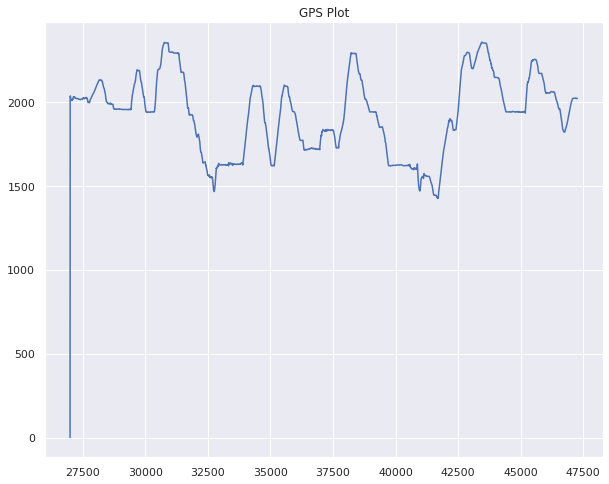

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
raw_filter['GPS_Alt'].plot(ax=ax, title='GPS Plot')
plt.show()
#raw_filter['GPS_Alt'].plot()

### Luigi Process

In [31]:
process_all  = ProcessDirectory(inputDir=project_root+'raw_split_files/',outputDir=project_root+'processed_data/')

In [32]:
luigi.build([process_all],local_scheduler=True)

DEBUG: Checking if ProcessDirectory(inputDir=/home/jjc/Projects/SkiTracker/raw_split_files/, outputDir=/home/jjc/Projects/SkiTracker/processed_data/) is complete
DEBUG: Checking if ProcessTask(file_name=sam_FR_10Apr20.pkl, inputDir=/home/jjc/Projects/SkiTracker/raw_split_files/, outputDir=/home/jjc/Projects/SkiTracker/processed_data/) is complete
DEBUG: Checking if ProcessTask(file_name=Josh_FR_26Feb23.pkl, inputDir=/home/jjc/Projects/SkiTracker/raw_split_files/, outputDir=/home/jjc/Projects/SkiTracker/processed_data/) is complete
DEBUG: Checking if ProcessTask(file_name=Josh_FR_27Feb23.pkl, inputDir=/home/jjc/Projects/SkiTracker/raw_split_files/, outputDir=/home/jjc/Projects/SkiTracker/processed_data/) is complete
DEBUG: Checking if ProcessTask(file_name=Josh_FR_28Feb23.pkl, inputDir=/home/jjc/Projects/SkiTracker/raw_split_files/, outputDir=/home/jjc/Projects/SkiTracker/processed_data/) is complete
DEBUG: Checking if ProcessTask(file_name=josh_BG_17Jan20.pkl, inputDir=/home/jjc/Projec

True

In [ ]:
# debug

In [19]:
df = pd.read_pickle('raw_split_files/josh_17Mar19.pkl')

In [20]:
df.head()

,Date,Time,Lat,Lon,GPS_Alt,Pressure,Pres_Alt,Temp,Batt
26034,03/17/2019,08:44:03,45.097191,6.069313,0.0,1.100222e+10,1859.802,23.4,4.022
26035,03/17/2019,08:44:04,45.097191,6.069315,1867.0,1.100222e+10,1860.903,23.4,3.945
26036,03/17/2019,08:44:05,45.097191,6.069309,1867.1,1.100222e+10,1860.602,23.4,3.925
26037,03/17/2019,08:44:06,45.097195,6.069302,1867.2,1.100222e+10,1859.802,23.5,3.938
26038,03/17/2019,08:44:07,45.097195,6.069293,1867.0,1.100222e+10,1860.703,23.5,3.938


In [21]:
from skitracker_utils import find_routes, prepare_data

In [22]:
df = prepare_data(df)

In [23]:
runs = find_routes(df)

In [24]:
for i, run in enumerate(runs):
    print(i, run['scale'])

0 5.814194836983694
1 5.944191166440021
2 6.355485670423555
3 8.529248018342143
4 8.976568430178716
5 5.583955214190283
6 6.4812934693615105
7 4.6784004290629255
8 5.334170275938502
9 6.820314180491962
10 6.891502908832487
11 1.2122750699281015
